<img src='stats/img/topbar.png' />

## Natural Language Processing (NLP)

__CONTEÚDO:__<br>
* [4. Bag of Words](#0.)
* [4.1 Aplicação 1: Identificação de Spam](#1.)
* [4.2 Aplicação 2: ](#2.)

<a id="0."></a><br>
### 4. Bag of Words

<a id="1."></a><br>
### Aplicação 1: Spam Detection

__ETAPAS:__<br>
* [1. Preparação do problema](#1.)
* [2. Sumarizar Dados](#2.)
* [3. Preparar Dados](#3.)
* [4. Avaliar Algoritmo](#4.)

<a id="1."></a><br>
#### 1. Preparação do problema
* a) Esclarecer o problema
* b) Carregar libraries
* c) Carregar dataset

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import seaborn as sns
#nltk.download() -> Necessário instalar na primeira vez
from nltk.corpus import PlaintextCorpusReader, stopwords
from matplotlib.colors import ListedColormap
# conda install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('white')
%matplotlib inline

messages = pd.read_csv('data/SMSSpamCollection', sep='\t', names=["label", "message"])

<a id="2."></a><br>
#### 2. Sumarizar Dados
* a) Estatística descritiva
* b) Visualização de dados e estrutura
* c) EDA

In [290]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [291]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [292]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [293]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [294]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E0D09ED08>,
      dtype=object)

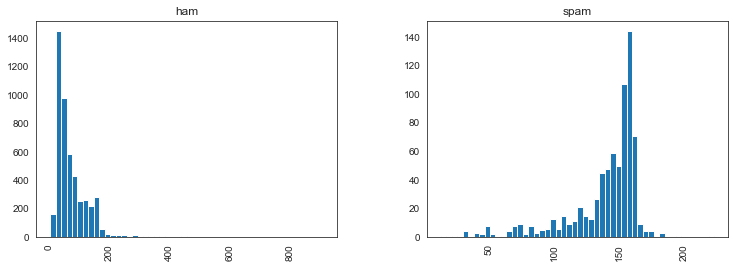

In [295]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

<a id="3."></a><br>
#### 3. Preparar Dados
* a) Limpeza de dados
* b) Seleção de características
* c) Transformação dos dados
* d) Dividir conjunto de dados em partes de treino e teste/validação

In [297]:
def text_process(msg):
    # Retira pontuações
    nopunc = [char for char in msg if char not in string.punctuation]

    # Junta-os para formar strings
    nopunc = ''.join(nopunc)
    
    # Remove as stopwords e retorna
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [298]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [299]:
cv = CountVectorizer()

In [300]:
X = cv.fit_transform(messages['message'])
y = messages['label']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<a id="4."></a><br>
#### 4. Avaliar algoritmos
* a) Treinar algoritmos com o conjunto de treino
* b) Avaliar desempenho no conjunto de teste e/ou validação

In [302]:
nb = MultinomialNB()

In [303]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [304]:
y_pred = nb.predict(X_test)

In [305]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1443
        spam       0.93      0.95      0.94       229

    accuracy                           0.98      1672
   macro avg       0.96      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



Text(0.5, 1, 'Confusion Matrix')

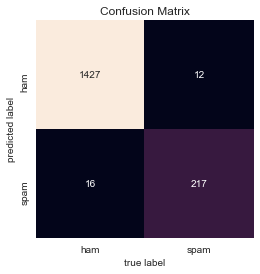

In [307]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['ham', 'spam'],
            yticklabels=['ham', 'spam'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')

In [315]:
all_words_ham = ' '.join(messages[messages['label'] == 'ham']['message'])

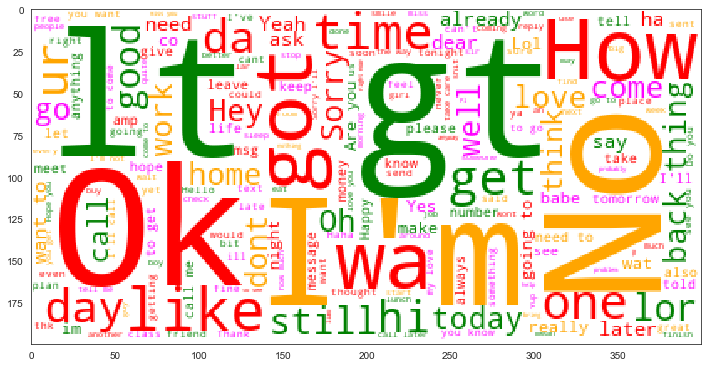

In [323]:
stops = stopwords.words('english')
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta'])
nuvem = WordCloud(background_color = 'white',
                  colormap = mapa_cores,
                  stopwords = stops,
                  max_words = 200)
nuvem.generate(all_words_ham)
plt.figure(figsize=(12, 8))
plt.imshow(nuvem)

In [324]:
all_words_spam = ' '.join(messages[messages['label'] == 'spam']['message'])

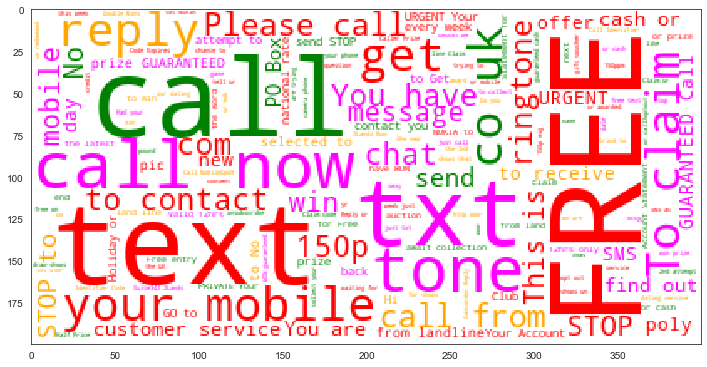

In [326]:
nuvem.generate(all_words_spam)
plt.figure(figsize=(12, 8))
plt.imshow(nuvem)

<a id="5."></a><br>
#### 5. Melhorar Desempenho
* a) Verificar desempenho do(s) algoritmo(s) com os dados normalizados ou padronizados.
* b) Verificar desempenho do(s) algoritmo(s) em diferentes ajustes de parâmetros da técnica.
* c) Avaliar relevância de atributos x ruídos.

In [86]:
#NA

<a id="6."></a><br>
#### 6. Finalizar Modelo
* a) Selecionar parâmetros ajustados do modelo
* b) Criar modelo standalone com o conjunto completo de treino
* c) Armazenar modelo para uso futuro

In [ ]:
from pickle import dump, load

# Salvar modelo 
filename = 'model.sav'
# dump(knn_cv, open(filename, 'wb'))

# Carregar modelo
# loaded_model = load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)